In [1]:
import numpy as np                              #numeric python
import matplotlib.pyplot as plt                 #matlab style plotting
import scipy.integrate as sci                   #integration toolbox

In [2]:
G = 6.6742*10**-11;                             #Gravitational constant (SI Unit)
Rplanet = 6357000.0                             #meters
mplanet = 5.972e24                              #kg

mass = 640.0/1000.0                             #rocket kg

In [3]:
##Gravitational Acceleration Model
def gravity(x,z):
    global Rplanet,mplanet
    
    r = np.sqrt(x**2 + z**2)
    
    if r < Rplanet:
        accelx = 0.0
        accelz = 0.0
    else:
        accelx = G*mplanet/(r**3)*x
        accelz = G*mplanet/(r**3)*z
        
    return np.asarray([accelx,accelz])

In [4]:
def Derivatives(state,t):
    ###Globals
    global mass
    #state vector
    x = state[0]
    z = state[1]                                # z is the altitude from the center of the planet along the north pole
    velx = state[2]
    velz = state[3]
    
    #Compute zdot - Kinematic Relationship
    zdot = velz                                 # zdot is the velocity along z
    xdot = velx                                 # zddot is the acceleration along z
    
    gravityF = -gravity(x,z)*mass               #GRavity
    aeroF = np.asarray([0.0,0.0])               #Aerodynamics
    thrustF = np.asarray([0.0,0.0])             #Thrust   
    Forces = gravityF + aeroF + thrustF
    
    #Compute Acceleration
    ddot = Forces/mass
    statedot = np.asarray([xdot,zdot,ddot[0],ddot[1]])
    
    return statedot

In [5]:
#Test Surface Gravity
print('Surface Gravity (m/s^2) = ',gravity(0,Rplanet))

Surface Gravity (m/s^2) =  [0.         9.86312626]


In [6]:
#Initial Conditions
x0 = Rplanet ##m
z0 = 0.0
r0 = np.sqrt(x0**2+z0**2)
velz0 = np.sqrt(G*mplanet/r0)*1.1
velx0 = 100.0
stateinitial = np.asarray([x0,z0,velx0,velz0])

In [7]:
#Time window
period = 2*np.pi/np.sqrt(G*mplanet)*r0**(3.0/2.0)*1.5
tout = np.linspace(0,period,1000)

In [8]:
#Numerical Integration Call
stateout = sci.odeint(Derivatives,stateinitial,tout)

In [9]:
#REname variables
xout = stateout[:,0]
zout = stateout[:,1]
altitude = np.sqrt(xout**2+zout**2) - Rplanet
velxout = stateout[:,2]
velzout = stateout[:,3]
velout = np.sqrt(velxout**2 + velzout**2)

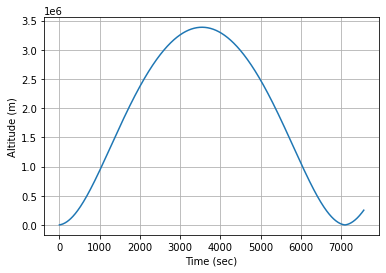

In [10]:
#Plot ALTITUDE
plt.plot(tout,altitude)
plt.xlabel('Time (sec)')
plt.ylabel('Altitude (m)')
plt.grid()

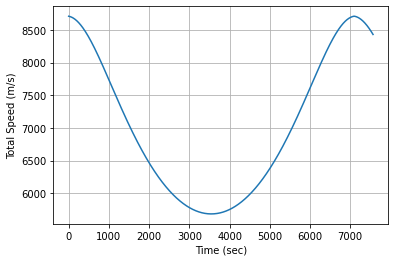

In [11]:
#Plot VELOCITY
plt.figure()
plt.plot(tout,velout)
plt.xlabel('Time (sec)')
plt.ylabel('Total Speed (m/s)')
plt.grid()

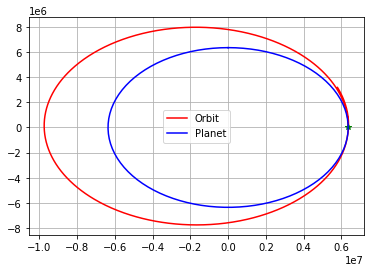

In [12]:
#Plot 2D Orbit
plt.figure()
plt.plot(xout,zout,'r-',label='Orbit')
plt.plot(xout[0],zout[0],'g*')
theta = np.linspace(0,2*np.pi,100)
xplanet = Rplanet*np.sin(theta)
yplanet = Rplanet*np.cos(theta)
plt.plot(xplanet,yplanet,'b-',label='Planet')
plt.grid()
plt.legend()